# Finance Supply Chain Simulation Data Generator

## Load Data Sets From Database

### Connect To The Database

In [1]:
import sqlite3

connection = sqlite3.connect('database.db')
cursor = connection.cursor()

#### [SQL] Load Hospital Data Set

In [2]:
sql = "SELECT * FROM hospital"
hospitals = list(cursor.execute(sql))

#### [SQL] Load Pharmacy Data Set

In [3]:
sql = "SELECT * FROM pharmacy"
pharmacies = list(cursor.execute(sql))

#### [SQL] Load Drug Data Set

In [4]:
sql = "SELECT * FROM drug"
drugs = list(cursor.execute(sql))

#### [SQL] Load Producer Data Set

In [5]:
sql = "SELECT * FROM producer"
producers = list(cursor.execute(sql))

#### [SQL] Load Distributor Data Set

In [6]:
sql = "SELECT * FROM distributor"
distributors = list(cursor.execute(sql))

#### [SQL] Load Supplier Data Set

In [7]:
sql = "SELECT * FROM supplier"
suppliers = list(cursor.execute(sql))

### Remove Variables, Close IO Streams

In [8]:
connection.commit()
cursor.close()
connection.close()

del connection, cursor, sql

## Generate Random Data Set For Hospitals

##### Defaults:
1. **Data generated for a year ago**
     * The data has a seasonal pattern
         1. In the spring quarter (normal), demand is within the defined range
         2. In the summer quarter (due to heat, etc.) demand is __15% lower__
         3. In the autumn quarter (due to diseases, etc.) demand is __15% higher__
         4. In the winter quarter (due to diseases, etc.) demand is __30% higher__
     * The data is generated randomly in a certain interval (according to the seasonal patterns)
     * The generated data is stored in a csv file (for the hospital **"dataset_hospitals.csv"**)
2. **Data Set Format**
    - **[Hospital_Name] [Date] [Demand_On_Med_@ID] ...**
        * [Kindred] [10/12/2021] [300 @Med1]
        * [Kindred] [10/13/2021] [230 @Med1]
        * ...

### Insert Records To Db

#### [SQL] Insert Hospital Demands

In [9]:
def new_hospital_demand(data: list) -> None:
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    for record in data:
        date, hospital_id, drug_id, demand = record["date"], record[
            "h_id"], record["d_id"], record["demand"]
        sql = f"INSERT INTO hospital_demand (orderDate, hospital_id, drug_id, demand) \
            VALUES ('{date}', {hospital_id}, {drug_id}, {demand});"

        cursor.execute(sql)
    connection.commit()
    cursor.close()
    connection.close()

### Generate Hospital Random Drug Demand
#### [Func] Generate Random Demand According To The Trend

In [10]:
import random

def h_random_demand(season: int, low_demand: str, up_demand: str) -> int:
    demand = random.randrange(int(low_demand) + 1, int(up_demand) + 1)
    if season == 0:
        return demand
    elif season == 1:
        return round(demand * 0.85)
    elif season == 2:
        return round(demand * 1.15)
    else:
        return round(demand * 1.3)

#### Generate Random Data For 3 Years

In [11]:
import datetime

generates = 1  # Random Data Generating Times

years = [2018, 2019, 2020]
months = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

for genrate in range(generates):
    data = []
    for year in years:
        for sdx, season in enumerate(months):
            for month in season:

                temp01, temp02 = year + 1 if month == 12 else year, 1 if month == 12 else month + 1
                d0 = datetime.datetime(year=year, month=month, day=1)
                d1 = datetime.datetime(year=temp01, month=temp02, day=1)

                for day in range(int((d1 - d0).days)):
                    current = datetime.datetime(year=year, month=month, day=day + 1)

                    for hospital in hospitals:
                        h_id = hospital[0]

                        for drug in drugs:
                            data.append({
                                "date": current,
                                "h_id": h_id,
                                "d_id": drug[0],
                                "demand": h_random_demand(sdx, drug[2], drug[3]),
                            })
    new_hospital_demand(data=data)  # Push Request To Db, Add Records

del generates, genrate, year, sdx, season, month, temp01, temp02, d0, d1, day, hospital, drug, data, current, h_id, months, years

## Generate Random Data Set For Pharmacies

##### Defaults:
1. **Data generated for a year ago**
     * The data has a seasonal pattern
         1. In the spring quarter (normal), demand is within the defined range
         2. In the summer quarter (due to heat, etc.) demand is __7% lower__
         3. In the autumn quarter (due to diseases, etc.) demand is __17% higher__
         4. In the winter quarter (due to diseases, etc.) demand is __35% higher__
     * Demand for pharmacies is higher than for hospitals in the last two seasons of the year. (Due to the general public's reference to daily supplements)
     * The data is generated randomly in a certain interval (according to the seasonal patterns)
     * The generated data is stored in a csv file (for the hospital **"dataset_Pharmacies.csv"**)
2. **Data Set Format**
    - **[Pharmacy_Name] [Date] [Demand_On_Med_@ID] ...**
        * [Walgreens] [10/12/2021] [30 @Med1]
        * [Walgreens] [10/13/2021] [20 @Med1]
        * ...

### Insert Records To Db

#### [SQL] Insert Phamacy Demands

In [12]:
def new_pharmacy_demand(data: list) -> None:
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    for record in data:
        date, pharmacy_id, drug_id, demand = record["date"], record["ph_id"], record["d_id"], record["demand"]
        sql = f"INSERT INTO pharmacy_demand (orderDate, pharmacy_id, drug_id, demand) \
            VALUES ('{date}', {pharmacy_id}, {drug_id}, {demand});"
        cursor.execute(sql)
    connection.commit()
    cursor.close()
    connection.close()

### Generate Pharmacy Random Drug Demand
#### [Func] Generate Random Demand According To The Trend

In [13]:
import random

def ph_random_demand(season: int, low_demand: str, up_demand: str) -> int:
    demand = random.randrange(int(low_demand) + 1, int(up_demand) + 1)
    if season == 0:
        return demand
    elif season == 1:
        return round(demand * 0.93)
    elif season == 2:
        return round(demand * 1.17)
    else:
        return round(demand * 1.35)

#### Generate Random Data For 3 Years

In [14]:
import datetime

generates = 1  # Random Data Generating Times

years = [2018, 2019, 2020]
months = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

for genrate in range(generates):
    data = []
    for year in years:
        for sdx, season in enumerate(months):
            for month in season:

                temp01, temp02 = year + 1 if month == 12 else year, 1 if month == 12 else month + 1
                d0 = datetime.datetime(year=year, month=month, day=1)
                d1 = datetime.datetime(year=temp01, month=temp02, day=1)

                for day in range(int((d1 - d0).days)):
                    current = datetime.datetime(year=year, month=month, day=day + 1)

                    for pharmacy in pharmacies:
                        ph_id = pharmacy[0]

                        for drug in drugs:
                            data.append({
                                "date": current,
                                "ph_id": ph_id,
                                "d_id": drug[0],
                                "demand": ph_random_demand(sdx, drug[4], drug[5])
                            })
    new_pharmacy_demand(data=data)  # Push Request To Db, Add Records

del generates, genrate, year, sdx, season, month, temp01, temp02, d0, d1, day, pharmacy, drug, data, current, ph_id, months, years

## Predict Simulation Year (2021) Orders

### Select The Simulation Interval

In [15]:
from datetime import date
from ipywidgets import widgets, interact
from IPython.display import display

start_date = widgets.DatePicker(description='Start Date', disabled=False)  # datetime.date(2021, 01, 01)
end_date = widgets.DatePicker(description='End Date', disabled=False)  # datetime.date(2021, 12, 31)
display(start_date)
display(end_date)

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

#### Get Date Values From Widgets

In [16]:
# GET Dates From Widget

start_date = start_date.value
end_date = end_date.value

#### [SQL] Insert Demand Estimation
> Average demand on the __same day in the previous year__ and __90 days before the selected date__.

In [17]:
def demandEstimation(typ: str, obj: int, drug: int, first_date, second_date):
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    sql = f'''SELECT AVG(demand) FROM {typ}_demand WHERE 
        {typ}_id={obj} AND drug_id={drug} AND 
        (orderDate='{first_date} 00:00:00' OR orderDate='{second_date} 00:00:00')'''
    demand = cursor.execute(sql).fetchone()
    cursor.close()
    connection.close()
    return round(demand[0])

#### Generate Data For Simulation Year

In [18]:
def getInterval(day):
    temp1, temp2 = day - timedelta(days=90), day - timedelta(days=365)
    return temp1, temp2

In [19]:
from datetime import timedelta, datetime

delta = end_date - start_date

for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)

    sdotma, sdolya = getInterval(day)  # Get 90 Days Ago, 365 Days Ago

    h_orders, ph_orders = [], []
    for drug in drugs:
        drug_id, drug_name = drug[0], drug[1]

        for hospital in hospitals:
            hospital_id, hospital_name = hospital[0], hospital[1]
            demand = demandEstimation("hospital", hospital_id, drug_id, sdotma, sdolya)
            h_orders.append({
                "date": f"{day} 00:00:00",
                "h_id": hospital_id,
                "d_id": drug_id,
                "demand": demand
            })

        for pharmacy in pharmacies:
            pharmacy_id, pharmacy_name = pharmacy[0], pharmacy[1]
            demand = demandEstimation("pharmacy", pharmacy_id, drug_id, sdotma, sdolya)
            ph_orders.append({
                "date": f"{day} 00:00:00",
                "ph_id": pharmacy_id,
                "d_id": drug_id,
                "demand": demand
            })

    new_hospital_demand(h_orders)
    new_pharmacy_demand(ph_orders)
del delta, i, day, sdotma, sdolya, h_orders, ph_orders, drug, drug_id, drug_name, hospital, hospital_id, hospital_name, demand, pharmacy, pharmacy_id, pharmacy_name

## Generate Initial Inventory Of SCF Members

In [ ]:
def new_inventory_record(typ: str, date, obj: int, drug: int,
                         inv: int) -> None:
    import sqlite3
    connection = sqlite3.connect("Data.db")
    cursor = connection.cursor()
    sql = f'''INSERT INTO {typ}_inventory (dayDate, {typ}_id, drug_id, inventory) 
        VALUES ("{date} 00:00:00", {obj}, {drug}, {inv})'''
    cursor.execute(sql)
    connection.commit()
    cursor.close()
    connection.close()
    return None

### Hospitals
> __400 $<=$ `Initial Inventory` $<$ 600__

In [ ]:
import random

for hospital in hospitals:
    hospital_id = hospital[0]
    for drug in drugs:
        drug_id = drug[0]
        rnd_inv = random.randrange(400, 600)
        new_inventory_record(typ="hospital",
                             date=start_date,
                             obj=hospital_id,
                             drug=drug_id,
                             inv=rnd_inv)
del hospital, hospital_id, drug, drug_id, rnd_inv

### Pharmacies
> __150 $<=$ `Initial Inventory` $<$ 250__

In [ ]:
import random

for pharmacy in pharmacies:
    pharmacy_id = pharmacy[0]
    for drug in drugs:
        drug_id = drug[0]
        rnd_inv = random.randrange(150, 250)
        new_inventory_record(typ="pharmacy",
                             date=start_date,
                             obj=pharmacy_id,
                             drug=drug_id,
                             inv=rnd_inv)
del pharmacy, pharmacy_id, drug, drug_id, rnd_inv

### Producers
> __1000 $<=$ `Initial Inventory` $<$ 1500__

In [ ]:
import random

for producer in producers:
    producer_id = producer[0]
    for drug in drugs:
        drug_id = drug[0]
        rnd_inv = random.randrange(1000, 1500)
        new_inventory_record(typ="producer",
                             date=start_date,
                             obj=producer_id,
                             drug=drug_id,
                             inv=rnd_inv)
del producer, producer_id, drug, drug_id, rnd_inv

### Distributors
> __500 $<=$ `Initial Inventory` $<$ 700__

In [ ]:
import random

for distributor in distributors:
    distributor_id = distributor[0]
    for drug in drugs:
        drug_id = drug[0]
        rnd_inv = random.randrange(500, 700)
        new_inventory_record(typ="distributor",
                             date=start_date,
                             obj=distributor_id,
                             drug=drug_id,
                             inv=rnd_inv)
del distributor, distributor_id, drug, drug_id, rnd_inv

## Generate Production Capacity Of SCF Producers

In [ ]:
def new_producer_capacity(producer: int, drug: int, capacity: int) -> None:
    import sqlite3
    connection = sqlite3.connect("Data.db")
    cursor = connection.cursor()
    sql = f'''INSERT INTO producer_capacity (producer_id, drug_id, capacity) 
        VALUES ({producer}, {drug}, {capacity})'''
    cursor.execute(sql)
    connection.commit()
    cursor.close()
    connection.close()
    return None

> __Capacity__ = 5 * hospital_up_demand

In [ ]:
for producer in producers:
    for drug in drugs:
        new_producer_capacity(producer=producer[0],
                              drug=drug[0],
                              capacity=5 * drug[3])
del producer

## Generate Producer Drug Sale Price

*__Defaults:__*
>1. Each drug has an __approved price__ in its raw input data, For example Ecotrin 15\$.
2. Each producer (according to its production conditions) announces a price in the range of __-3\% - +3\%__ around the approved price of the drug.
3. All drugs from each producer have a __10\%__ price increase over a __30-day period__.

### Insert Record To Db
#### [SQL] Insert Producer Sales Price

In [20]:
def new_producer_price(data: list) -> None:
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    for record in data:
        date, producer_id, drug_id, price = record["date"], record["pr_id"], record["d_id"], record["price"]
        sql = f"INSERT INTO producer_price (dayDate, producer_id, drug_id, price) \
            VALUES ('{date}', {producer_id}, {drug_id}, {price});"
        cursor.execute(sql)
    connection.commit()
    cursor.close()
    connection.close()

#### Generate Producer Drug Price For Simulation Year

In [21]:
from random import randrange
from datetime import timedelta, datetime

data = []
delta = end_date - start_date

for producer in producers:
    producer_id = producer[0]
    
    for drug in drugs:
        drug_id = drug[0]
        producer_rate = randrange(-3, 4)
        producer_increase_rate = 0
    
        for i in range(delta.days + 1):
            day = start_date + timedelta(days=i)
            price = drug[6] * (1 + (producer_rate / 100))
            
            if ((i + 1) % 30) == 0:
                producer_increase_rate += 0.1
            price *= (1 + producer_increase_rate)
            
            data.append({
                "date": f"{day} 00:00:00",
                "pr_id": producer_id,
                "d_id": drug_id,
                "price": round(price)
            })
    
new_producer_price(data)
del data, delta, producer, producer_id, drug, drug_id, producer_rate, producer_increase_rate, i, day, price

## Demand Data Visualization

### Demand Data

#### [SQL] Get All Data

In [22]:
def get_record(table: str, fields: str) -> list:
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    sql = f"SELECT {fields if fields else '*'} FROM {table} ORDER BY id"
    records = cursor.execute(sql).fetchall()
    cursor.close()
    connection.close()
    return records

#### [SQL] Get Member Demands

In [23]:
def get_demand_record(table: str, fields: str, member: int, drug: int,
                      start_date: str, end_date: str):
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    sql = f'''SELECT {fields if fields else '*'} FROM {table} WHERE (
        hospital_id{f"={member}" if member else ''} AND
        drug_id{f"={drug}" if drug else ''} AND
        orderDate{f">='{start_date}'" if start_date else ''} AND
        orderDate{f"<'{end_date}'" if end_date else ''})
        ORDER BY id'''
    records = cursor.execute(sql).fetchall()
    cursor.close()
    connection.close()
    return records

#### [SQL] Sum Member Demands

In [24]:
def sum_demand_record(table: str, member: int, drug: int, start_date: str,
                      end_date: str):
    import sqlite3
    _ = 'hospital_id' if table == 'hospital_demand' else 'pharmacy_id'
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    sql = f'''SELECT SUM(demand) FROM {table} WHERE (
        {_}{f"={member}" if member else ''} AND
        drug_id{f"={drug}" if drug else ''} AND
        orderDate{f">='{start_date}'" if start_date else ''} AND
        orderDate{f"<'{end_date}'" if end_date else ''})'''
    records = cursor.execute(sql).fetchone()
    cursor.close()
    connection.close()
    return records[0]

#### [SQL] Avg Member Demands

In [25]:
def avg_demand_record(table: str, member: int, drug: int, start_date: str,
                      end_date: str):
    import sqlite3
    _ = 'hospital_id' if table == 'hospital_demand' else 'pharmacy_id'
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    sql = f'''SELECT AVG(demand) FROM {table} WHERE (
        {_}{f"={member}" if member else ''} AND
        drug_id{f"={drug}" if drug else ''} AND
        orderDate{f">='{start_date}'" if start_date else ''} AND
        orderDate{f"<'{end_date}'" if end_date else ''})'''
    records = cursor.execute(sql).fetchone()
    cursor.close()
    connection.close()
    return records[0]

### Hospital Demand Chart

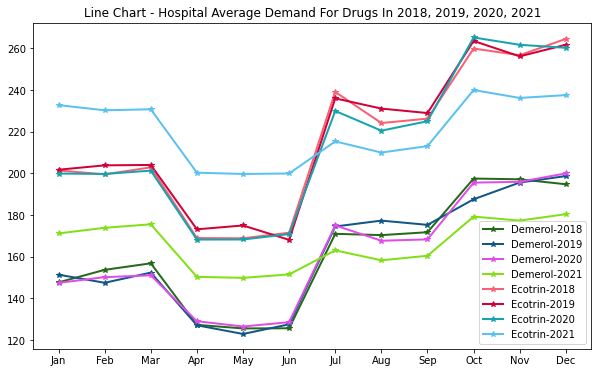

In [27]:
import random
import datetime
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'months': [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
}
drugs = get_record(table='drug', fields='id, name')
for drug in drugs:
    for year in [2018, 2019, 2020, 2021]:
        temp = []
        for month in range(1, 13):
            temp01, temp02 = year + 1 if month == 12 else year, 1 if month == 12 else month + 1
            sd = datetime.datetime(year=year, month=month, day=1)
            ed = datetime.datetime(year=temp01, month=temp02, day=1)
            d = avg_demand_record(table='hospital_demand',
                                  member='',
                                  drug=drug[0],
                                  start_date=sd,
                                  end_date=ed)
            temp.append(d)
        data[f"{drug[1]}-{year}"] = temp

df = pd.DataFrame(data)
for idx, key in enumerate(list(data.keys())):
    r = lambda: random.randint(0, 255)
    if idx != 0:
        plt.plot('months',
                 key,
                 data=df,
                 marker='*',
                 color='#%02X%02X%02X' % (r(), r(), r()),
                 linewidth=2)
plt.legend()
plt.title("Line Chart - Hospital Average Demand For Drugs In 2018, 2019, 2020, 2021")
plt.rcParams["figure.figsize"] = (10, len(drugs) * 3)
plt.show()

del data, drugs, drug, year, temp, month, temp01, temp02, sd, ed, d, df, idx, key, r

### Pharmacy Demand Data

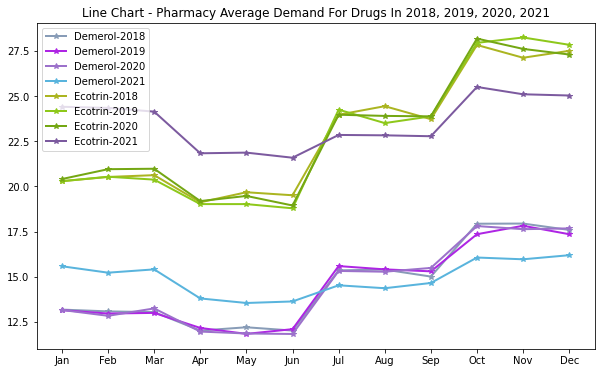

In [28]:
import random
import datetime
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'months': [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
}
drugs = get_record(table='drug', fields='id, name')
for drug in drugs:
    for year in [2018, 2019, 2020, 2021]:
        temp = []
        for month in range(1, 13):
            temp01, temp02 = year + 1 if month == 12 else year, 1 if month == 12 else month + 1
            sd = datetime.datetime(year=year, month=month, day=1)
            ed = datetime.datetime(year=temp01, month=temp02, day=1)
            d = avg_demand_record(table='pharmacy_demand',
                                  member='',
                                  drug=drug[0],
                                  start_date=sd,
                                  end_date=ed)
            temp.append(d)
        data[f"{drug[1]}-{year}"] = temp

df = pd.DataFrame(data)
for idx, key in enumerate(list(data.keys())):
    r = lambda: random.randint(0, 255)
    if idx != 0:
        plt.plot('months',
                 key,
                 data=df,
                 marker='*',
                 color='#%02X%02X%02X' % (r(), r(), r()),
                 linewidth=2)
plt.legend()
plt.title("Line Chart - Pharmacy Average Demand For Drugs In 2018, 2019, 2020, 2021")
plt.rcParams["figure.figsize"] = (10, len(drugs) * 3)
plt.show()

del data, drugs, drug, year, temp, month, temp01, temp02, sd, ed, d, df, idx, key, r, distributors, hospitals, pharmacies, producers, suppliers, interact

### Producer Drug Price Data

#### [SQL] Avg Producers Sales Price

In [29]:
def avg_producer_price(member: int, drug: int, start_date: str, end_date: str):
    import sqlite3
    connection = sqlite3.connect('database.db')
    cursor = connection.cursor()
    sql = f'''SELECT AVG(price) FROM producer_price WHERE (
        producer_id{f"={member}" if member else ''} AND
        drug_id{f"={drug}" if drug else ''} AND
        dayDate{f">='{start_date}'" if start_date else ''} AND
        dayDate{f"<'{end_date}'" if end_date else ''})'''
    records = cursor.execute(sql).fetchone()
    cursor.close()
    connection.close()
    return records[0]

### Producers Price Data

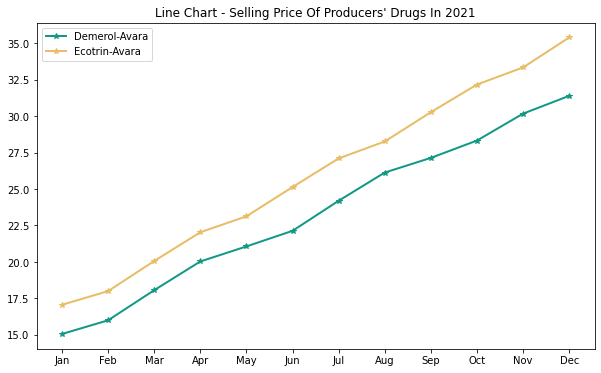

In [30]:
import random
import datetime
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'months': [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
}
drugs = get_record(table='drug', fields='id, name')
producers = get_record(table='producer', fields='id, name')
for drug in drugs:
    for producer in producers:
        temp = []
        for month in range(1, 13):
            temp01, temp02 = 2021 + 1 if month == 12 else 2021, 1 if month == 12 else month + 1
            sd = datetime.datetime(year=2021, month=month, day=1)
            ed = datetime.datetime(year=temp01, month=temp02, day=1)
            
            p = avg_producer_price(member='',
                                  drug=drug[0],
                                  start_date=sd,
                                  end_date=ed)
            temp.append(p)
        data[f"{drug[1]}-{producer[1]}"] = temp

df = pd.DataFrame(data)
for idx, key in enumerate(list(data.keys())):
    r = lambda: random.randint(0, 255)
    if idx != 0:
        plt.plot('months',
                 key,
                 data=df,
                 marker='*',
                 color='#%02X%02X%02X' % (r(), r(), r()),
                 linewidth=2)
plt.legend()
plt.title("Line Chart - Selling Price Of Producers' Drugs In 2021")
plt.rcParams["figure.figsize"] = (10, len(drugs) * 3)
plt.show()
del data, drugs, producers, drug, producer, temp, temp01, temp02, month, sd,ed, p, df, idx, key, r, plt, start_date, end_date, randrange